## **Task 1:Exploratory Data Analysis (EDA)**


1. Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the Dataset

In [ ]:
df = pd.read_csv("heart.csv")

3. Initial Exploration

In [ ]:
# display the fisrt five rows
print(df.head())

# Get information about the dataset
print(df.info())

# Get statistical summary
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

4. Visualizations

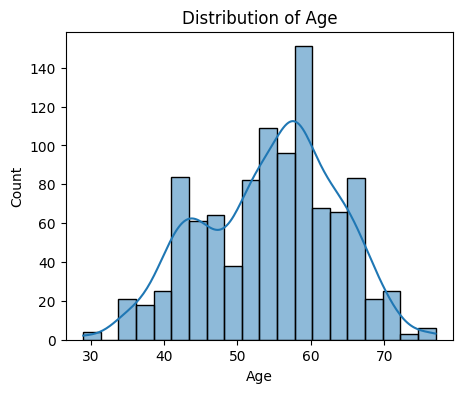

In [ ]:
# Histrogram of age
plt.figure(figsize = (5, 4))
sns.histplot(df["age"], bins = 20, kde = True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

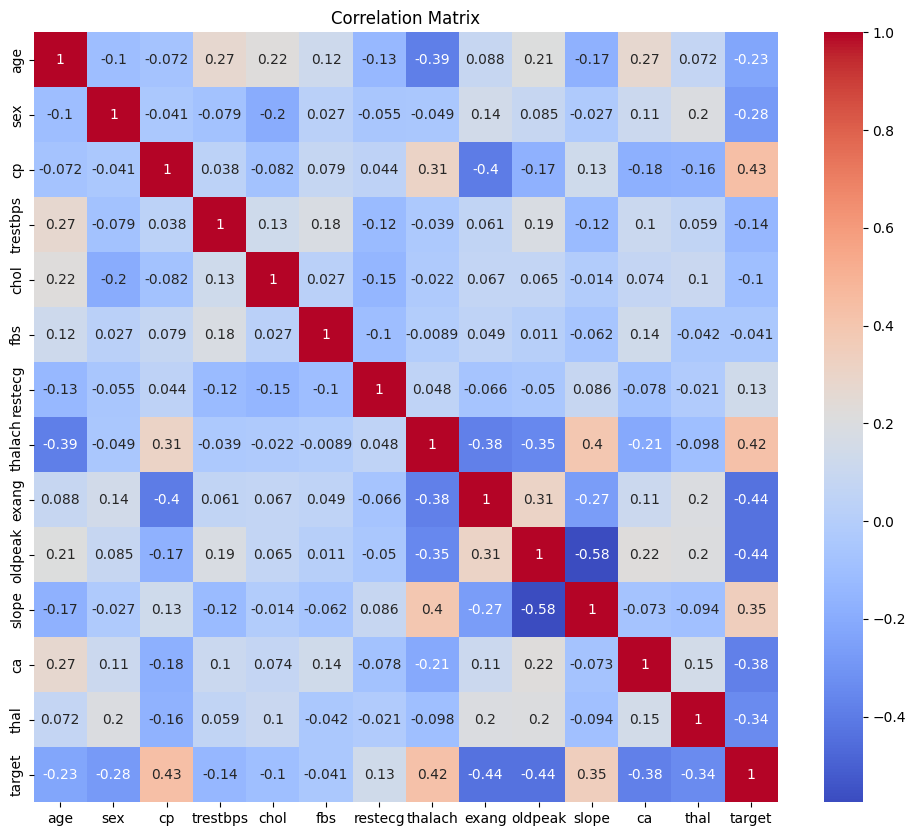

In [ ]:
data = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

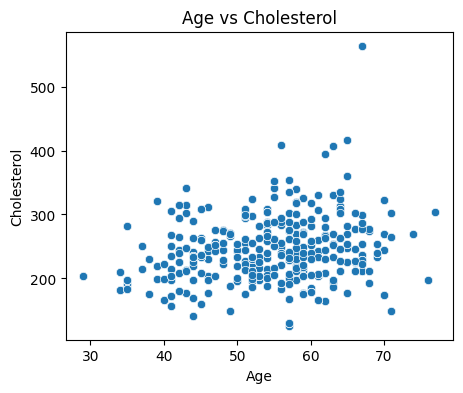

In [ ]:
# Scatter plot: Age vs Cholesterol
plt.figure(figsize = (5, 4) )
sns.scatterplot(x = "age", y = "chol", data = df)
plt.title("Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

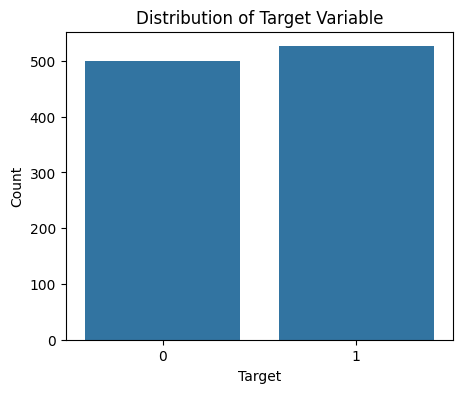

In [ ]:
# Bar chart: Distribution of Target Variable
plt.figure(figsize=(5, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

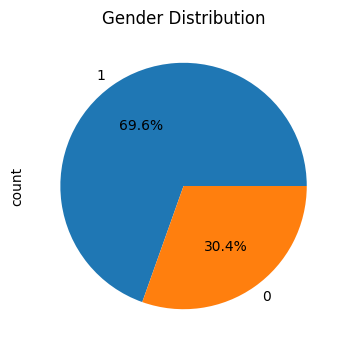

In [ ]:
# Pie chart: Gender Distribution
plt.figure(figsize=(5, 4))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

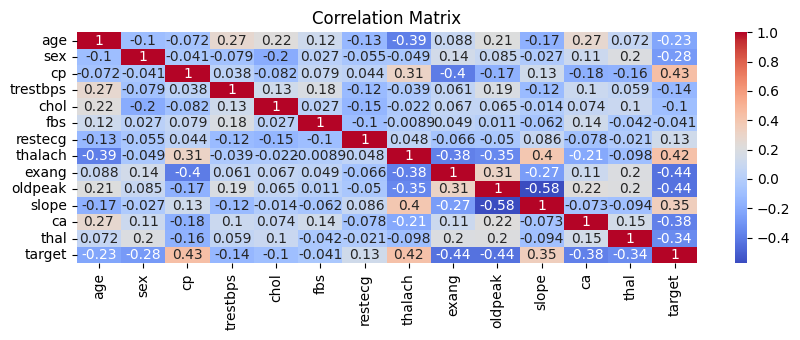

In [ ]:

# Heatmap: Correlation Matrix
plt.figure(figsize=(10, 3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Task 2: Data Preprocessing**

1. Check for Missing Values

In [ ]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


2. Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


3.Box plot

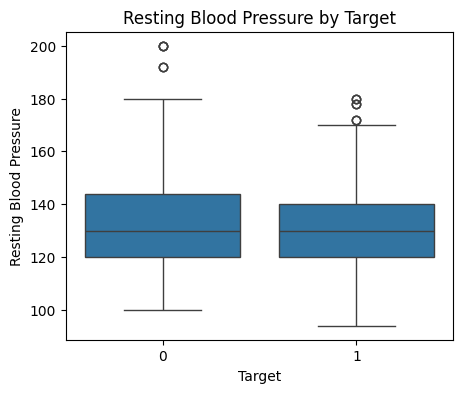

In [ ]:
# Boxplot for resting Blood Pressure
plt.figure(figsize = (5,4))
sns.boxplot(x = "target", y="trestbps",data = df )
plt.title("Resting Blood Pressure by Target")
plt.xlabel("Target")
plt.ylabel("Resting Blood Pressure")
plt.show()



4. Class Imbalance

In [ ]:
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


5.Splitting the Data into Train and Test Sets:

In [ ]:
from sklearn.model_selection import train_test_split
x = df_scaled.drop('target', axis=1)  # Features
y = df_scaled['target']  # Target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Fit and Evaluate Traditional Machine Learning Models





####  Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

initialize the model

In [ ]:
log_reg = LogisticRegression(max_iter=1000)


Train the model

In [ ]:
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Predictions

In [ ]:
y_pred_log_reg = log_reg.predict(x_test)


Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
# MSE, MAE, RMSE, R²
mse = mean_squared_error(y_test, y_pred_log_reg)
mae = mean_absolute_error(y_test, y_pred_log_reg)
rmse = root_mean_squared_error(y_test, y_pred_log_reg)
r2 = r2_score(y_test, y_pred_log_reg)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}')

MSE: 0.18536585365853658, MAE: 0.18536585365853658, RMSE: 0.43054134953397516, R²: 0.25851894155720523


#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


Initialize the model

In [ ]:
rf_classifier = RandomForestClassifier()

Train the Model

In [ ]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

Predictions

In [ ]:
y_pred_rf = rf_classifier.predict(x_test)

Evaluation

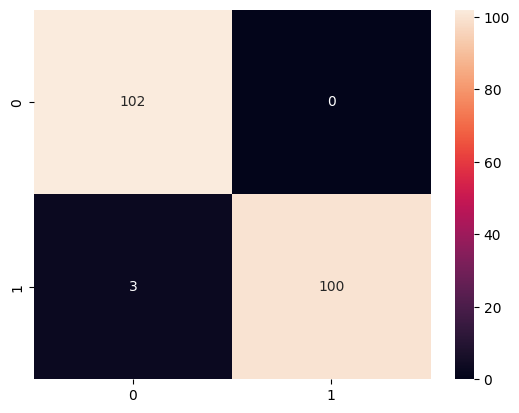

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       102
         1.0       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

AUC ROC: 1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

#confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Classification report
print(classification_report(y_test, y_pred_rf))

# AUC ROC Curve
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(x_test)[:, 1])
print(f'AUC ROC: {roc_auc}')

#### Decision Tree Classifier







In [ ]:
from sklearn.tree import DecisionTreeClassifier

Initialize the Model

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)


Train The Model

In [ ]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

Prediction

In [ ]:
y_pred_dt = dt_classifier.predict(x_test)


Evaluation

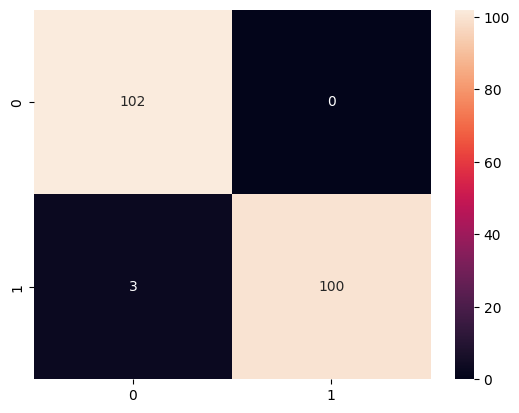

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       102
         1.0       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

AUC ROC: 0.9854368932038835


In [ ]:

#confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Classification report
print(classification_report(y_test, y_pred_dt))

# AUC ROC Curve
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(x_test)[:, 1])
print(f'AUC ROC: {roc_auc}')

#### Support Vector Machine (SVM)


In [ ]:
from sklearn.svm import SVC

initialize the Model

In [ ]:
svm_classifier = SVC(probability = True)

Train the Model

In [ ]:
svm_classifier.fit(x_train, y_train)

SVC(probability=True)

Prediction

In [ ]:
y_pred_svm = svm_classifier.predict(x_test)

Evaluation

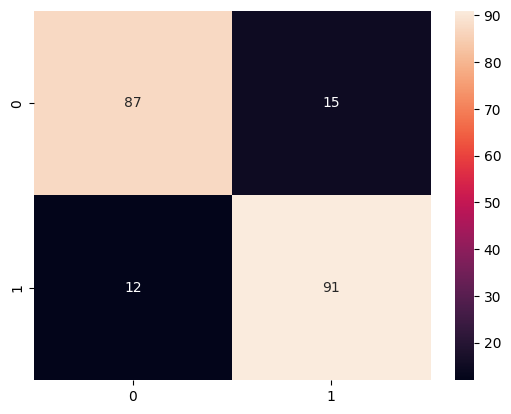

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       102
         1.0       0.86      0.88      0.87       103

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

AUC ROC: 0.9331810394060537


In [ ]:

#confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Classification report
print(classification_report(y_test, y_pred_svm))

# AUC ROC Curve
roc_auc = roc_auc_score(y_test, svm_classifier.predict_proba(x_test)[:, 1])
print(f'AUC ROC: {roc_auc}')

####K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

 Initialize the KNN model

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

Fit the model on the training data

In [ ]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

Prediction

In [ ]:
y_pred_knn = knn_classifier.predict(x_test)

Evaluation

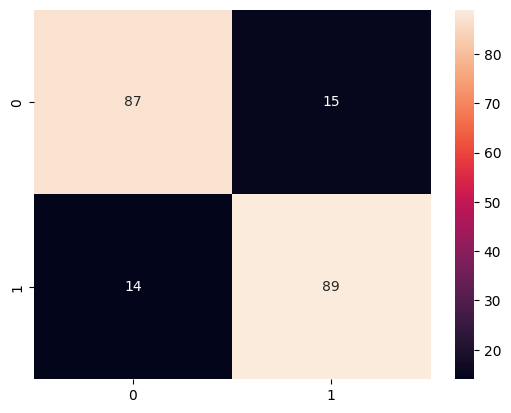

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       102
         1.0       0.86      0.86      0.86       103

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

AUC ROC: 0.9592613744526937


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Classification report
print(classification_report(y_test, y_pred_knn))

# AUC ROC Curve
roc_auc = roc_auc_score(y_test, knn_classifier.predict_proba(x_test)[:, 1])
print(f'AUC ROC: {roc_auc}')